In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as sps
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#build distribution
cov = [[10, 8], [8, 10]]
mean = [0,0]
distr = sps.multivariate_normal(mean=mean, cov=cov)

#get density values in [l_bound , r_bound] x [l_bound , r_bound] 
l_bound = -10
r_bound = 10
n = 200.0
step = (r_bound - l_bound) / n
grid = np.mgrid[l_bound:r_bound:step, l_bound:r_bound:step]
density = np.array([[distr.pdf((grid[0, i, j], grid[1, i, j]))
                        for i in range(grid[0].shape[0])]
                        for j in range(grid[0].shape[1])])

Построим график плотности случайного вектора $(\xi_{1},\xi_{2}) \sim \mathcal{N}(a, \Sigma)$ ,

где $a =  \begin{pmatrix} 0 \\ 0  \end{pmatrix} $ , $\Sigma = \begin{pmatrix} 10 & 8 \\ 8 & 10  \end{pmatrix}$.

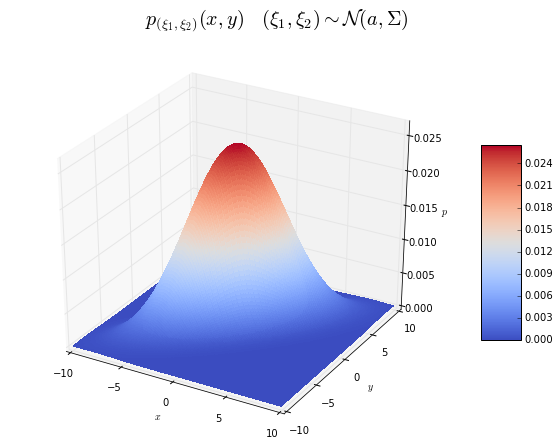

In [29]:
fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(grid[0], grid[1], density, 
                       rstride=1, cstride=1,
                       cmap=mpl.cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, density.max())
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$p$')
fig.suptitle(r'$p_{(\xi_{1},\xi_{2})}(x,y) \
             \quad (\xi_{1},\xi_{2}) \sim \
             \mathcal{N}(a, \Sigma)$',
             fontsize=20)
plt.show()


Для $y \in \{−3, 0, 1, 5\}$ построим графики $f_{\xi_1|\xi_2}(x|y)$

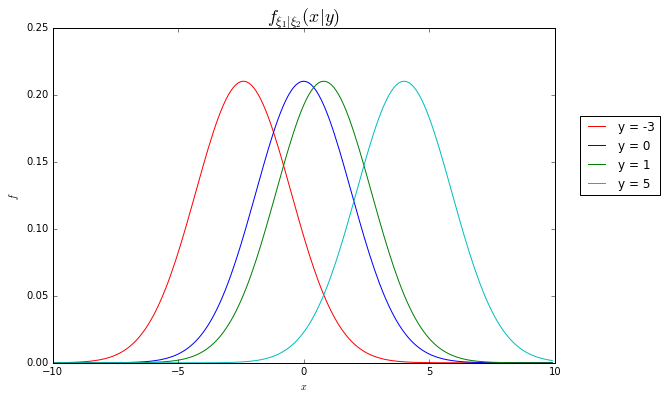

In [30]:
import scipy.integrate as integrate
def cond_density(x0 , y0) :
    fxy = distr.pdf((x0,y0))
    fy = integrate.quad(lambda x: distr.pdf((x, y0)),-np.inf, np.inf)[0]
    return fxy / fy

Y = [-3, 0, 1, 5]
OX = np.arange(l_bound,r_bound,step)
OYs = [[cond_density(x,y) for x in OX] for y in Y]

#build plot
color = ['r' , 'b' , 'g' , 'c']
plt.figure(figsize=(9,6))
for i in range(len(Y)):
    plt.plot(OX,OYs[i], color[i] , label = r'y = ' + str(Y[i]))
plt.title(r'$f_{\xi_1|\xi_2}(x|y)$', fontsize = 18)
plt.xlabel(r'$x$')
plt.ylabel(r'$f$')
plt.legend(loc = (1.05,0.5) , fontsize = 12)
plt.show()

Найдем $E(\xi_1 | \xi_2 = y)$. Заметим, что $cov(5\xi_1 - 4\xi_2 , \xi_2) = 0$.

Случайные величины $5\xi_1 - 4\xi_2$ и $\xi_2$ имеют нормальное распределение т.к. $(\xi_1 , \xi_2)$ - гауссовский,

следовательно $(5\xi_1 - 4\xi_2) \bot \xi_2 \implies $

$0 = E(5\xi_1 - 4\xi_2) = E(5\xi_1 - 4\xi_2 | \xi_2) = 5E(\xi_1|\xi_2) - 4E(\xi_2 | \xi_2) \implies E(\xi_1|\xi_2) =  \frac{4}{5} \xi_2$.

Подставляя $\xi_2 = y$ получим $E(\xi_1|\xi_2 = y) = \frac{4}{5} y$

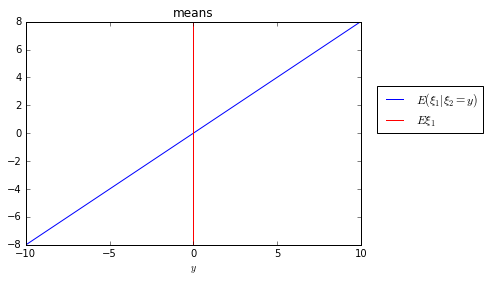

In [11]:
#plot is line so we need only two points
OX = [l_bound , r_bound]
condexp = [y*(4.0/5.0) for y in OX]
mean = 0
plt.plot(OX , condexp , color = 'b' , label = r'$E(\xi_1|\xi_2 = y)$')
plt.plot([mean,mean] , [condexp[0] , condexp[1]] ,
         color = 'r' , label = r'$E\xi_1$' )
plt.title('means')
plt.xlabel(r'$y$')
plt.legend(loc=(1.05,0.5))
plt.show()